# Libraries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import numpy as np
import sklearn.preprocessing
import sklearn.cross_validation
import sklearn.decomposition
import sklearn.linear_model
import sklearn.neighbors
import sklearn.svm
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.metrics

/home/ggomarr/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Read data

In [3]:
work_dir='/home/ggomarr/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/' + \
         'Course data/Part 9 - Dimensionality Reduction/Section 45 - Kernel PCA/'
df=pd.read_csv(work_dir+'Social_Network_Ads.csv')[]
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
X=df.drop(['User ID','Gender','Purchased'],axis=1).values
Y=df['Purchased'].values
X[:5],Y[:5]

(array([[  1.90000000e+01,   1.90000000e+04],
        [  3.50000000e+01,   2.00000000e+04],
        [  2.60000000e+01,   4.30000000e+04],
        [  2.70000000e+01,   5.70000000e+04],
        [  1.90000000e+01,   7.60000000e+04]]), array([0, 0, 0, 0, 0]))

# Clean up missing data

In [5]:
sum(X!=X),sum(np.isnan(Y))

(array([0, 0]), 0)

# Feature scaling

In [6]:
X_scaler=sklearn.preprocessing.StandardScaler().fit(X)
X_scaled=X_scaler.transform(X)
X_scaled[:5]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

# Train/test split

In [7]:
X_all_train,X_all_test,Y_train,Y_test=sklearn.cross_validation.train_test_split(X_scaled,Y,
                                                                                test_size=0.2,random_state=0)
X_all_train.shape,X_all_test.shape

((320, 2), (80, 2))

# Kernel PCA

In [10]:
n_components=2
kpca=sklearn.decomposition.KernelPCA(n_components=n_components,kernel='rbf').fit(X_all_train)
X_train=kpca.transform(X_all_train)
X_test=kpca.transform(X_all_test)
X_train.shape,X_test.shape

((320, 2), (80, 2))

# Classifiers

In [11]:
model_classes={
                '01 - Logistic Regression':{ 'model':sklearn.linear_model.LogisticRegression,
                                             'params':{} },
                '02 - Nearest Neighbors [5 neighbors]':{ 'model':sklearn.neighbors.KNeighborsClassifier,
                                                         'params':{'n_neighbors':5,
                                                                   'metric':'minkowski',
                                                                   'p':2} },
                '03 - SVM linear': { 'model':sklearn.svm.SVC,
                                     'params':{'kernel':'linear'} },
                '04 - SVM poly':   { 'model':sklearn.svm.SVC,
                                     'params':{'kernel':'poly'} },
                '05 - SVM rbf':    { 'model':sklearn.svm.SVC,
                                     'params':{'kernel':'rbf'} },
                '06 - SVM sigmoid':{ 'model':sklearn.svm.SVC,
                                     'params':{'kernel':'sigmoid'} },
                '07 - GaussianNB':{ 'model':sklearn.naive_bayes.GaussianNB,
                                'params':{} },
                '08 - Decision Tree':{ 'model':sklearn.tree.DecisionTreeClassifier,
                                       'params':{'criterion':'entropy',
                                                 'random_state':0} },
                '09 - Random forest 1 [10 trees]':{ 'model':sklearn.ensemble.RandomForestClassifier,
                                                    'params':{'criterion':'entropy',
                                                              'n_estimators':10,
                                                              'random_state':0} },
                '10 - Random forest 2 [100 trees]':{ 'model':sklearn.ensemble.RandomForestClassifier,
                                                     'params':{'criterion':'entropy',
                                                               'n_estimators':100,
                                                               'random_state':0} },
              }

In [15]:
def range_plot_X(X,num=100,ext=0.1):
    max_X,min_X=max(X),min(X)
    delta=max_X-min_X
    max_X,min_X=max_X+ext*delta,min_X-ext*delta
    delta=(max_X-min_X)/(num-1)
    return np.array(np.arange(min_X,max_X+delta,delta)[:num].reshape((num,1)))

In [16]:
X_plot,Y_plot=np.meshgrid(range_plot_X(X_train[:,0],num=1000),range_plot_X(X_train[:,1],num=1000))
cmap_lst=('red','green')

=== 01 - Logistic Regression ===

Score:
Train 0.88 - Test 0.91

Train

Confusion matrix:
[[179  20]
 [ 18 103]]

Classification report:
             precision    recall  f1-score   support

          0       0.91      0.90      0.90       199
          1       0.84      0.85      0.84       121

avg / total       0.88      0.88      0.88       320



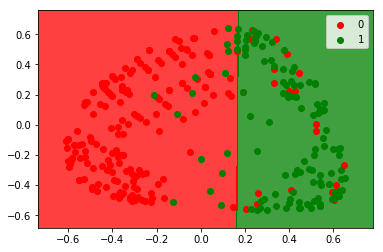


Test

Confusion matrix:
[[54  4]
 [ 3 19]]

Classification report:
             precision    recall  f1-score   support

          0       0.95      0.93      0.94        58
          1       0.83      0.86      0.84        22

avg / total       0.91      0.91      0.91        80



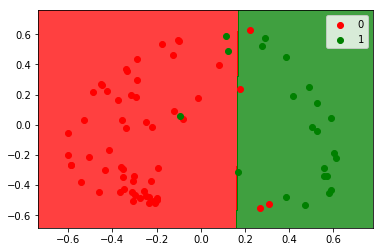

=== 02 - Nearest Neighbors [5 neighbors] ===

Score:
Train 0.91 - Test 0.95

Train

Confusion matrix:
[[178  21]
 [  7 114]]

Classification report:
             precision    recall  f1-score   support

          0       0.96      0.89      0.93       199
          1       0.84      0.94      0.89       121

avg / total       0.92      0.91      0.91       320



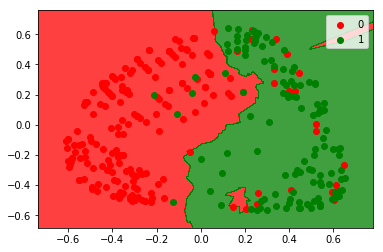


Test

Confusion matrix:
[[55  3]
 [ 1 21]]

Classification report:
             precision    recall  f1-score   support

          0       0.98      0.95      0.96        58
          1       0.88      0.95      0.91        22

avg / total       0.95      0.95      0.95        80



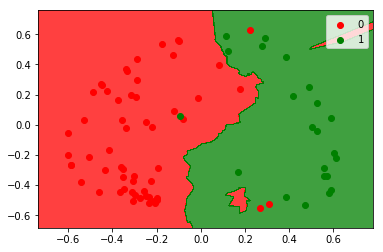

=== 03 - SVM linear ===

Score:
Train 0.89 - Test 0.91

Train

Confusion matrix:
[[176  23]
 [ 13 108]]

Classification report:
             precision    recall  f1-score   support

          0       0.93      0.88      0.91       199
          1       0.82      0.89      0.86       121

avg / total       0.89      0.89      0.89       320



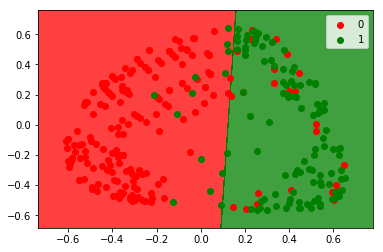


Test

Confusion matrix:
[[54  4]
 [ 3 19]]

Classification report:
             precision    recall  f1-score   support

          0       0.95      0.93      0.94        58
          1       0.83      0.86      0.84        22

avg / total       0.91      0.91      0.91        80



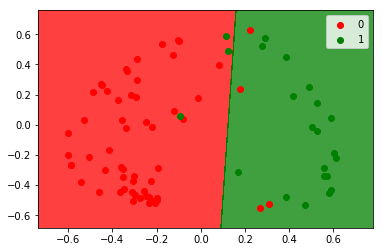

=== 04 - SVM poly ===

Score:
Train 0.62 - Test 0.72

Train

Confusion matrix:
[[198   1]
 [119   2]]

Classification report:
             precision    recall  f1-score   support

          0       0.62      0.99      0.77       199
          1       0.67      0.02      0.03       121

avg / total       0.64      0.62      0.49       320



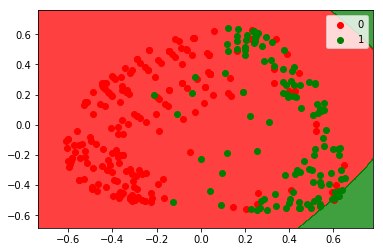


Test

Confusion matrix:
[[58  0]
 [22  0]]

Classification report:
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        58
          1       0.00      0.00      0.00        22

avg / total       0.53      0.72      0.61        80



/home/ggomarr/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


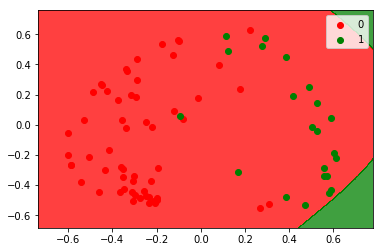

=== 05 - SVM rbf ===

Score:
Train 0.90 - Test 0.94

Train

Confusion matrix:
[[177  22]
 [ 10 111]]

Classification report:
             precision    recall  f1-score   support

          0       0.95      0.89      0.92       199
          1       0.83      0.92      0.87       121

avg / total       0.90      0.90      0.90       320



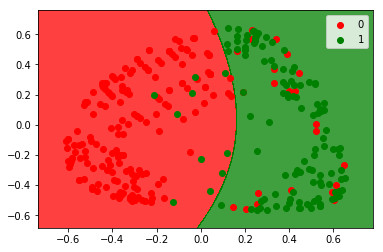


Test

Confusion matrix:
[[54  4]
 [ 1 21]]

Classification report:
             precision    recall  f1-score   support

          0       0.98      0.93      0.96        58
          1       0.84      0.95      0.89        22

avg / total       0.94      0.94      0.94        80



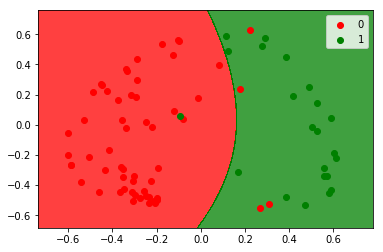

=== 06 - SVM sigmoid ===

Score:
Train 0.89 - Test 0.91

Train

Confusion matrix:
[[176  23]
 [ 13 108]]

Classification report:
             precision    recall  f1-score   support

          0       0.93      0.88      0.91       199
          1       0.82      0.89      0.86       121

avg / total       0.89      0.89      0.89       320



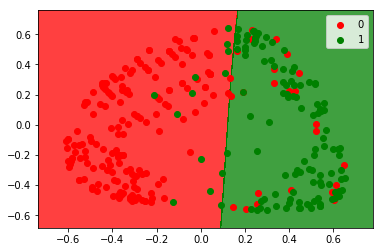


Test

Confusion matrix:
[[54  4]
 [ 3 19]]

Classification report:
             precision    recall  f1-score   support

          0       0.95      0.93      0.94        58
          1       0.83      0.86      0.84        22

avg / total       0.91      0.91      0.91        80



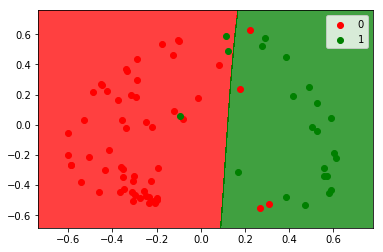

=== 07 - GaussianNB ===

Score:
Train 0.89 - Test 0.91

Train

Confusion matrix:
[[177  22]
 [ 13 108]]

Classification report:
             precision    recall  f1-score   support

          0       0.93      0.89      0.91       199
          1       0.83      0.89      0.86       121

avg / total       0.89      0.89      0.89       320



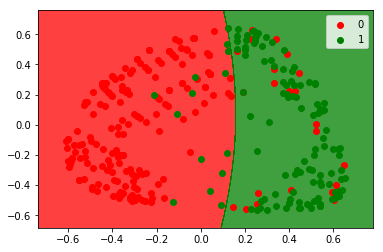


Test

Confusion matrix:
[[54  4]
 [ 3 19]]

Classification report:
             precision    recall  f1-score   support

          0       0.95      0.93      0.94        58
          1       0.83      0.86      0.84        22

avg / total       0.91      0.91      0.91        80



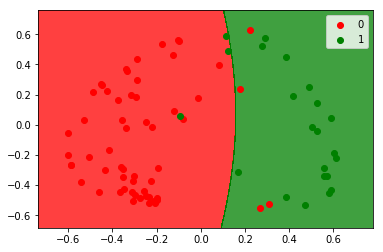

=== 08 - Decision Tree ===

Score:
Train 1.00 - Test 0.89

Train

Confusion matrix:
[[199   0]
 [  1 120]]

Classification report:
             precision    recall  f1-score   support

          0       0.99      1.00      1.00       199
          1       1.00      0.99      1.00       121

avg / total       1.00      1.00      1.00       320



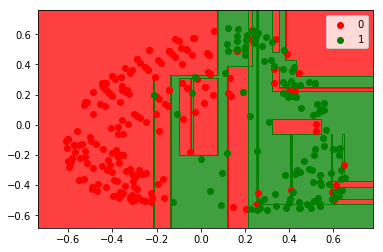


Test

Confusion matrix:
[[53  5]
 [ 4 18]]

Classification report:
             precision    recall  f1-score   support

          0       0.93      0.91      0.92        58
          1       0.78      0.82      0.80        22

avg / total       0.89      0.89      0.89        80



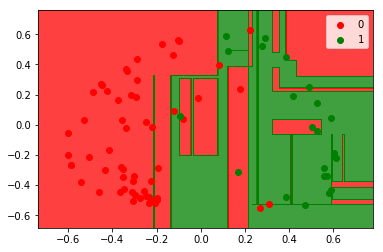

=== 09 - Random forest 1 [10 trees] ===

Score:
Train 1.00 - Test 0.93

Train

Confusion matrix:
[[199   0]
 [  1 120]]

Classification report:
             precision    recall  f1-score   support

          0       0.99      1.00      1.00       199
          1       1.00      0.99      1.00       121

avg / total       1.00      1.00      1.00       320



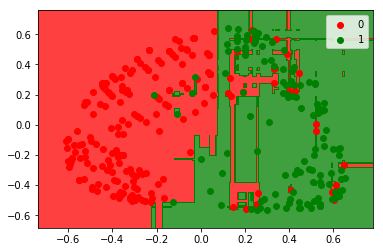


Test

Confusion matrix:
[[54  4]
 [ 2 20]]

Classification report:
             precision    recall  f1-score   support

          0       0.96      0.93      0.95        58
          1       0.83      0.91      0.87        22

avg / total       0.93      0.93      0.93        80



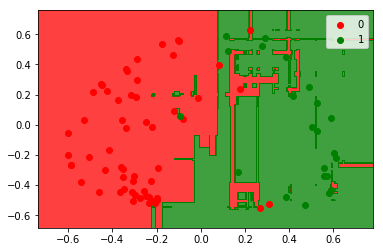

=== 10 - Random forest 2 [100 trees] ===

Score:
Train 1.00 - Test 0.94

Train

Confusion matrix:
[[199   0]
 [  1 120]]

Classification report:
             precision    recall  f1-score   support

          0       0.99      1.00      1.00       199
          1       1.00      0.99      1.00       121

avg / total       1.00      1.00      1.00       320



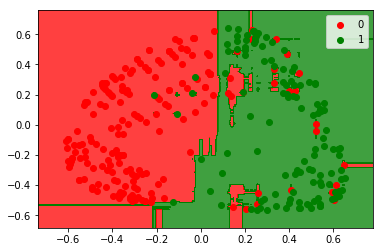


Test

Confusion matrix:
[[54  4]
 [ 1 21]]

Classification report:
             precision    recall  f1-score   support

          0       0.98      0.93      0.96        58
          1       0.84      0.95      0.89        22

avg / total       0.94      0.94      0.94        80



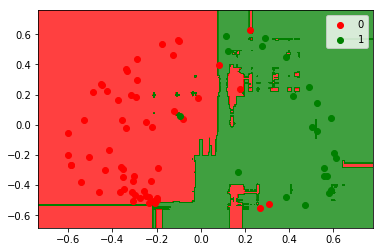

In [18]:
for class_name in sorted(model_classes):
    print('=== {} ==='.format(class_name))
    model_class=model_classes[class_name]['model']
    params=model_classes[class_name]['params']
    model=model_class(**params).fit(X_train,Y_train)
    print('\nScore:')
    print('Train {:0.2f} - Test {:0.2f}'.format(model.score(X_train,Y_train),model.score(X_test,Y_test)))
    print('\nTrain')
    print('\nConfusion matrix:')
    print(sklearn.metrics.confusion_matrix(Y_train,model.predict(X_train)))
    print('\nClassification report:')
    print(sklearn.metrics.classification_report(Y_train,model.predict(X_train)))
    cont=model.predict(np.array([X_plot.ravel(),Y_plot.ravel()]).T).reshape(X_plot.shape)
    plt.contourf(X_plot,Y_plot,cont,alpha=0.75,cmap=matplotlib.colors.ListedColormap(cmap_lst))
    for n in range(len(cmap_lst)):
        plt.scatter(X_train[Y_train==n,0],X_train[Y_train==n,1],c=cmap_lst[n],label=n)
    plt.legend()
    plt.show()
    print('\nTest')
    print('\nConfusion matrix:')
    print(sklearn.metrics.confusion_matrix(Y_test,model.predict(X_test)))
    print('\nClassification report:')
    print(sklearn.metrics.classification_report(Y_test,model.predict(X_test)))
    plt.contourf(X_plot,Y_plot,cont,alpha=0.75,cmap=matplotlib.colors.ListedColormap(cmap_lst))
    for n in range(len(cmap_lst)):
        plt.scatter(X_test[Y_test==n,0],X_test[Y_test==n,1],c=cmap_lst[n],label=n)
    plt.legend()
    plt.show()